In [ ]:
# 1 - preparação do ambiente
#importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

   temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


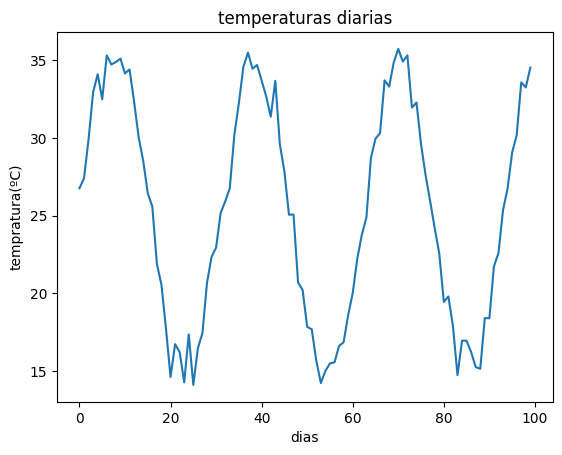

In [ ]:
# 2 - carregamento e preparação dos dados
#gerando dados ficticios de temperaturas diarias p ultimos 100 dias
#a temperatura sgue uma onda senoidal com pouco de ruído p simular variação real

np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0,1,100)

#tranformando os dados em Dataframe p facilitar a manipulaçao
df = pd.DataFrame(data, columns=["temperatura"])

#exibindo as primeiras 5 linhas do df p visualizar dados
print(df.head())

#visualizando os dados d temperatura p ter ideia  das tendencias
plt.plot(df)

plt.title("temperaturas diarias")

plt.xlabel("dias")

plt.ylabel("tempratura(ºC)")

plt.show()

In [ ]:
# 3 - pré-processamento dos dados
#normalizaçao dos dados p intervalo [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

#função p criar janelas deslizantes
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

#criando janelas deslizantes com 30 dias de timestep
time_step = 30
X, y = create_dataset(scaled_data, time_step)

#reshape p entrada no LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

#dividindo os dados em treino e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# 4 - construção da rede LSTM
#criando o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

#treinando o modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.4324
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3313 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2226
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1608
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1218
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1363
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1364
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1160
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1056
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0978
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0939
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0954
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0868
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0763
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0770
Epoch 16/100
2/2 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
RMSE: 515.4056614877667


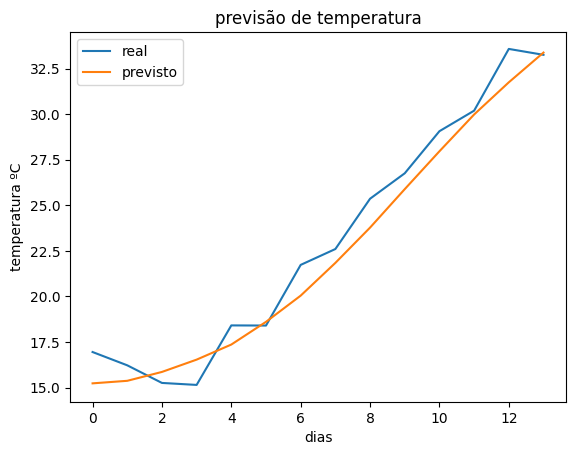

In [ ]:
# 5- avaliação e previsão
#fazendo previsões nos dados d teste
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

#avaliando o desempenho do modelo
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(predicted)))
print(f"RMSE: {rmse}")

#visualizando as previsoes
plt.plot(scaler.inverse_transform([y_test])[0], label='real')
plt.plot(predicted, label='previsto')
plt.title('previsão de temperatura')
plt.xlabel('dias')
plt.ylabel('temperatura ºC')
plt.legend()
plt.show()